### Multivariate Time Series

**Multivariate Time Series(다변량 시계열)** 은 각 시간 단위마다 여러개의 값을 가지는 시계열을 의미한다. 거시경제분석, Pair Trading 등의 분야에서 많이 사용된다

#### 1. Vector Process

**1.1 Weak Stationarity and Cross-Correlation Matrices**

k-dimensional time series $\mathbf{r} _t = [r_{1t}, \cdots, r_{kt}]^{'}$를 고려하자. 이들의 first, second moment가 시간에 영향을 받지 않는 시계열이면 weakly stationary하다고 한다. 특히, weakly stationary한 시계열의 Covariance matrix와 mean vector는 Constant 하다.
Weakly stationary time series $\mathbf{r} _t$가 있을 때, mean vector는
$$\mathbf{μ} = E(\mathbf{r} _t)$$
이고, Covariance matrix는
$$\mathbf{Γ} _0 = E[(\mathbf{r} _t - \mathbf{μ})(\mathbf{r} _t - \mathbf{μ})^{'}]$$
이다. 여기서 기대값은 $\mathbf{r} _t$의 joint distribution에서 추정된 것이다

#### exercise 1

pandas datareader로부터 데이터를 가져와 mean vector와 covariance matrix를 생성해 보자

In [1]:
import pandas_datareader as pdr
import datetime
import numpy as np
import pandas as pd

start_date = datetime.datetime(2020, 1, 1)
end_date = datetime.datetime(2023, 1, 1)

samsung = pdr.DataReader("005930", "naver", start_date, end_date).astype(int)
kakao = pdr.DataReader("035720", "naver", start_date, end_date).astype(int)
hynics = pdr.DataReader("000660", "naver", start_date, end_date).astype(int)
LG = pdr.DataReader("003550", "naver", start_date, end_date).astype(int)

각 종목별 수익률을 계산해 줘야 한다

In [2]:
ret_samsung = (np.log(samsung.Close) - np.log(samsung.Close.shift())).dropna()
ret_kakao = (np.log(kakao.Close) - np.log(kakao.Close.shift())).dropna()
ret_hynics = (np.log(hynics.Close) - np.log(hynics.Close.shift())).dropna()
ret_LG = (np.log(LG.Close) - np.log(LG.Close.shift())).dropna()

수익률이 계산되었으면, 하나의 Data Frame으로 결합해야 한다

In [3]:
matrix = pd.concat([ret_samsung, ret_kakao, ret_hynics, ret_LG], axis = 1)
matrix.columns = ['Samsung','Kakao','Hynics','LG']
matrix

,Samsung,Kakao,Hynics,LG
Date,,,,
2020-01-03,0.005420,0.000000,-0.002114,0.007003
2020-01-06,0.000000,0.013016,-0.002119,-0.001406
2020-01-07,0.005391,0.034982,-0.003186,0.013894
2020-01-08,0.017762,-0.003119,0.035531,-0.016681
2020-01-09,0.031198,0.027816,0.016294,-0.001411
...,...,...,...,...
2022-12-23,-0.017065,-0.031339,-0.017835,0.019681
2022-12-26,-0.003448,0.003738,-0.010336,-0.008563
2022-12-27,0.003448,0.014815,0.000000,0.006124


`mean()` method에서 axis를 0으로 지정하여 계산하면 각 종목별 평균 수익률을 계산할 수 있다

In [4]:
matrix.mean(axis = 0)

Samsung    0.000002
Kakao      0.000743
Hynics    -0.000315
LG         0.000204
dtype: float64

`cov()` method를 사용하면 DataFrame의 Covariance를 계산할 수 있다

In [5]:
matrix.cov()

,Samsung,Kakao,Hynics,LG
Samsung,0.000277,0.000159,0.000279,0.000182
Kakao,0.000159,0.000650,0.000198,0.000158
Hynics,0.000279,0.000198,0.000542,0.000219
LG,0.000182,0.000158,0.000219,0.000551


seaborn library에서 `heatmap()` 함수를 이용하면 시각화를 할 수 있다

<AxesSubplot:>

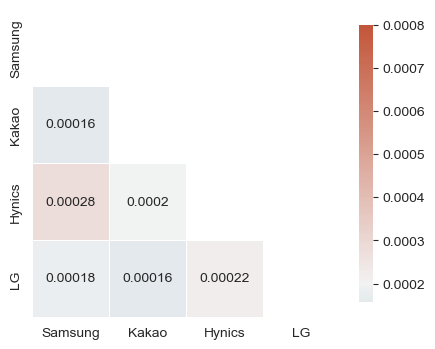

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
mask = np.triu(np.ones_like(matrix.cov(), dtype = bool))
f, ax = plt.subplots(figsize = (5, 4))
cmap = sns.diverging_palette(230, 20, as_cmap = True)
sns.heatmap(matrix.cov(), mask = mask, cmap = cmap, vmax = .0008, center = 0.0002,
            square = True, linewidths = .5, cbar_kws = {"shrink": .9}, annot = True)

**1.2 Cross-Correlation**

행렬 $\mathbf{D}$를 $k \times k$ 크기의 대각행렬이라 가정하자. 즉, $\mathbf{D} = \mbox{diag}\{\sqrt{\Gamma_{11}(0)},\cdots,\sqrt{\Gamma_{kk}(0)}\}$이다. 다변량 수익률 행렬$\mathbf{r} _t$의 concurrent하고, lag가 0인 cross correlation matrix는 다음과 같이 정의된다

$$\mathbf{ρ}_0 = [\rho_{ij}(0)] = \mathbf{D^{-1}\Gamma_0D^{-1}}$$